kNN is a supervised ML algorithm used for both regression and classification tasks                      
kNN is also called non-parametric algorithm

kNN is one of the simplest supervised learning algorithms                
kNN assumes the similarity between new case/data and available cases and put the new case into the category that is most similar to the available categories                        
kNN does not learn from the data it just stores the data and at the time of classification it performs an action on the dataset

How does kNN work:
1. calculate the distance from new data point to all the training data points
2. select the k nearest points
3. count the number of data points in each category
4. assign the new data point to the category which has more count in the category

Advantages             
1. it is simple to implenment
2. it is robust to noisy training data
3. it can be more effective if hte training data is large

Disadvantages
1. Always needs to determine the value of k which may be complex some time
2. the computation cost is high because of calculating the distance between the data points for all the training samples.

there is no particular way to select the value of k                             
we need to try some values and select the best out of them                     
most preferred value of k is 5

In [12]:
import pandas as pd

In [14]:
df=pd.read_csv(r"C:\Users\PHANEENDRA\Downloads\Cranes ML\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


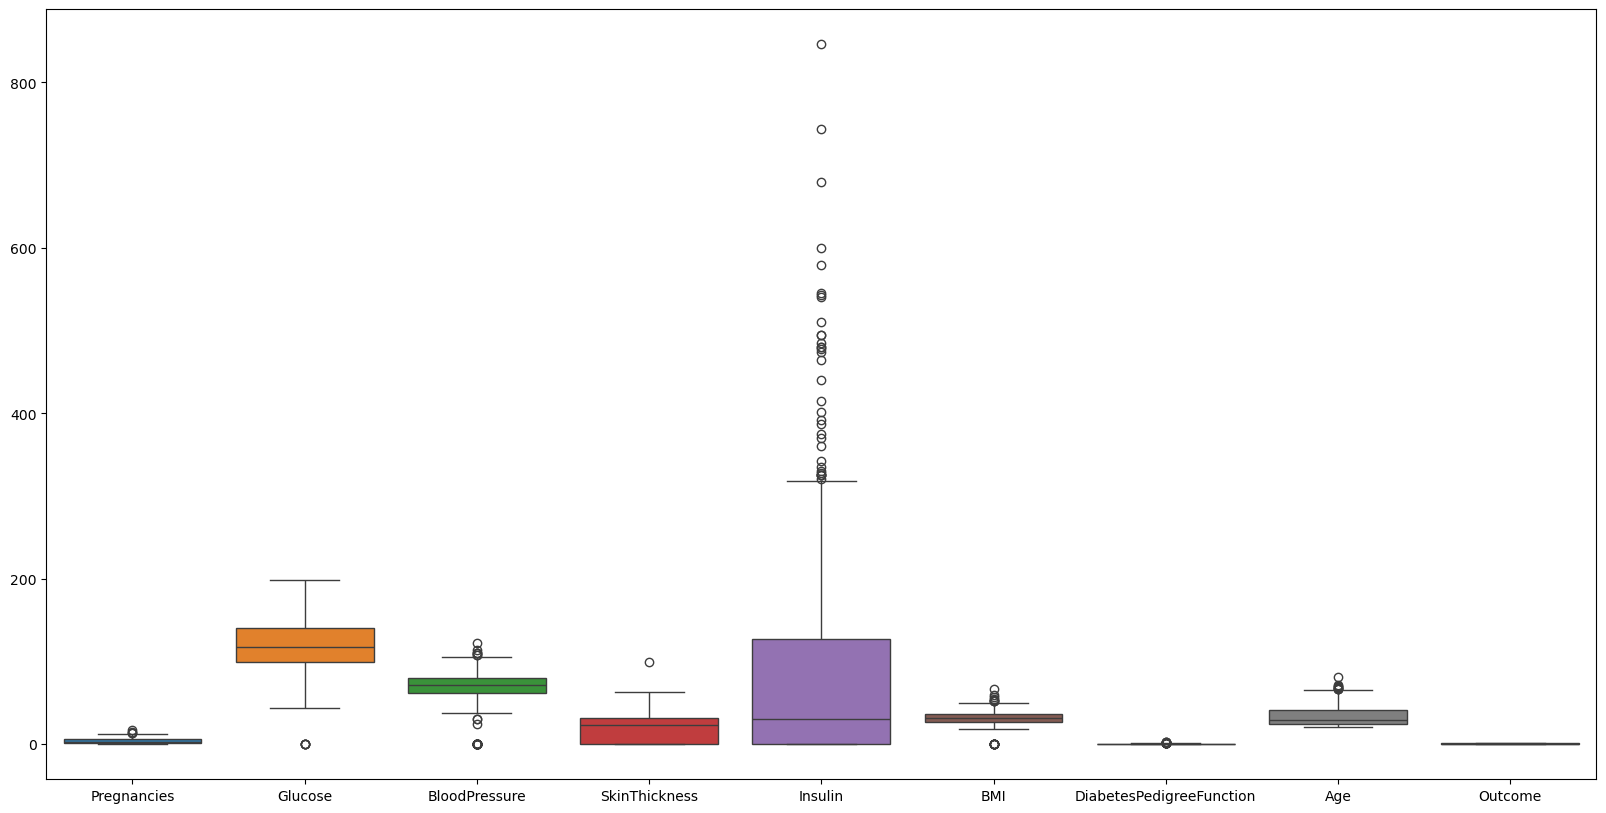

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.boxplot(data=df[['Pregnancies','SkinThickness','Insulin','DiabetesPedigreeFunction','Age']])
sns.boxplot(data=df[df.columns])
plt.gcf().set_size_inches(20, 10)  # Width=10, Height=6
plt.show()

In [70]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [72]:
# q1=df.describe().iloc[4,0]
# q3=df.describe().iloc[6,0]
# iqr=q3-q1
# min=q1-1.5*iqr
# max=q3+1.5*iqr

In [116]:
for col in df.describe().drop(columns='Outcome').columns:
    # print(col,' ',df.describe()[col][4])
    q1=df.describe().loc['25%',col]
    q3=df.describe().loc['75%',col]
    iqr=q3-q1
    min=q1-1.5*iqr
    max=q3+1.5*iqr

    df[col]=df[col].mask(~df[col].between(min,max),df[col].mean())

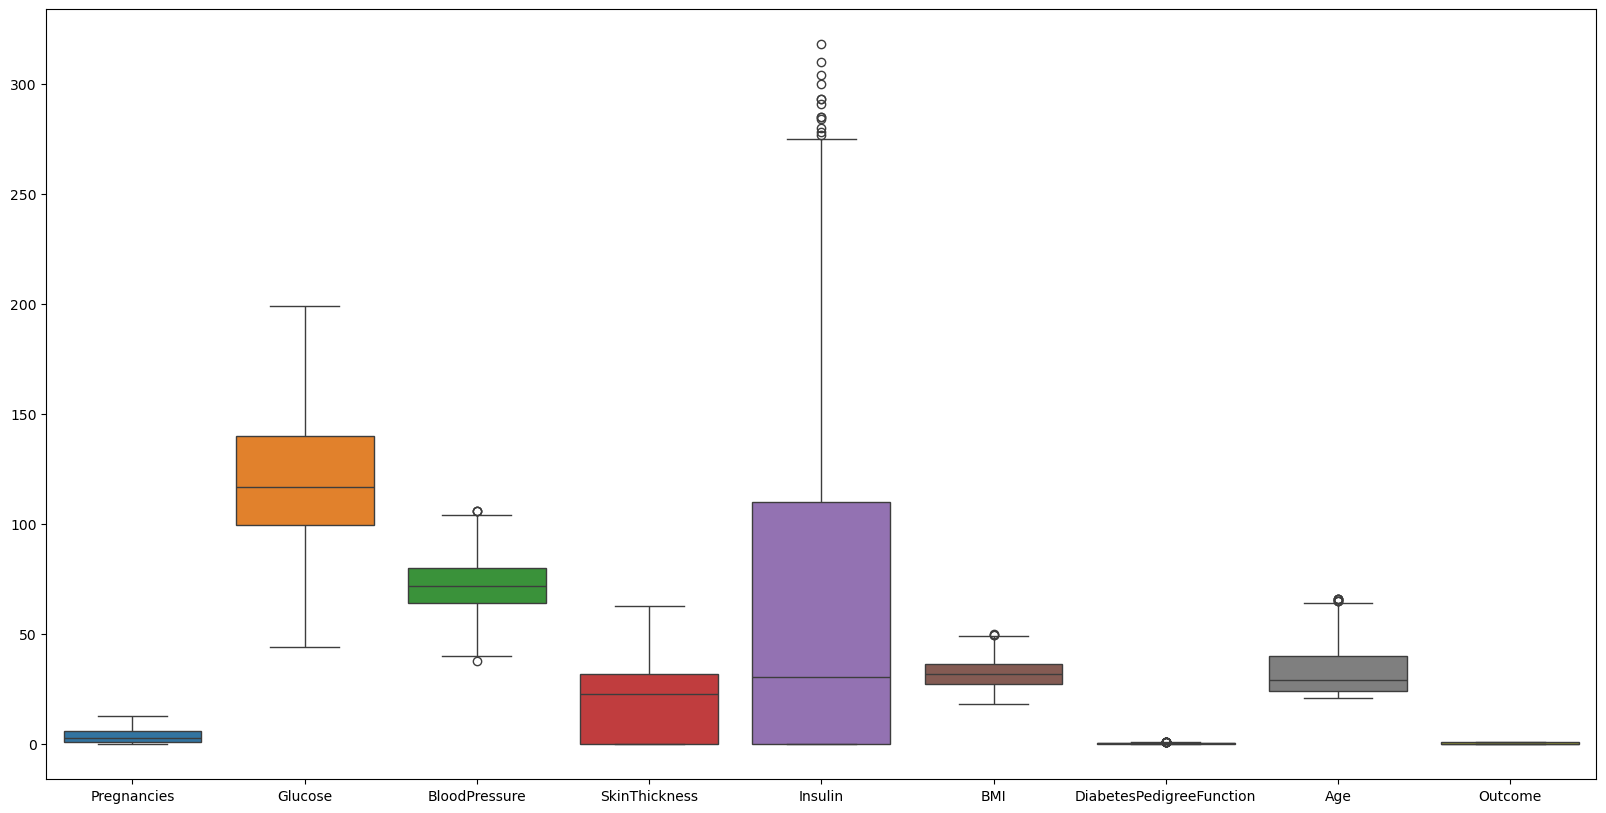

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.boxplot(data=df[['Pregnancies','SkinThickness','Insulin','DiabetesPedigreeFunction','Age']])
sns.boxplot(data=df[df.columns])
plt.gcf().set_size_inches(20, 10)  # Width=10, Height=6
plt.show()

In [122]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.0000,768.000000,768.00000,768.000000,768.000000
mean,3.786953,121.681605,72.027013,20.434292,63.1018,32.198775,0.43142,32.810115,0.348958
std,3.270156,30.436016,11.170450,15.698281,77.4423,6.410564,0.24505,11.047889,0.476951
min,0.000000,44.000000,38.000000,0.000000,0.0000,18.200000,0.07800,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.0000,27.500000,0.24375,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.5000,32.000000,0.37250,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,110.0000,36.300000,0.58225,40.000000,1.000000
max,13.000000,199.000000,106.000000,63.000000,318.0000,50.000000,1.19100,66.000000,1.000000


In [128]:
# def remove_outliers_iqr(df):
#     q1=df.quantile(0.25)
#     q3=df.quantile(0.75)
#     iqr = q3-q1
#     lb=q1-1.5*iqr
#     ub=q3+1.5*iqr

#     x=df[~((df<lb)|(df>ub))]
#     return x

In [130]:
# df=remove_outliers_iqr(df)

In [138]:
x=df.drop(columns='Outcome')
y=df['Outcome']

In [142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [146]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

neighbors=np.arange(1,11)
train_accuracy=[]
test_accuracy=[]

for i in neighbors:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

In [148]:
train_accuracy

[1.0,
 0.8469055374592834,
 0.8680781758957655,
 0.8192182410423453,
 0.8208469055374593,
 0.7882736156351792,
 0.8045602605863192,
 0.7833876221498371,
 0.7980456026058632,
 0.7817589576547231]

In [150]:
test_accuracy

[0.6558441558441559,
 0.6688311688311688,
 0.6688311688311688,
 0.6688311688311688,
 0.6363636363636364,
 0.6753246753246753,
 0.6623376623376623,
 0.6688311688311688,
 0.6948051948051948,
 0.7207792207792207]

Text(0, 0.5, 'Accuracy')

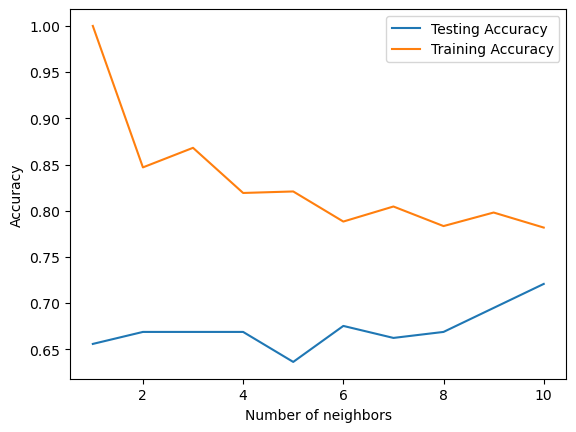

In [154]:
import matplotlib.pyplot as plt
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [161]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\PHANEENDRA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [163]:
model.score(x_test,y_test)

0.7467532467532467